<center>
    <img src="https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/adsp_logo.png?raw=1">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Allpass Filters

In [21]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/sLY2mSAPh6M" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

So far we specified the magnitude of our frequency response and didn't care much about the phase. For allpass filters, it is basically the other way around.

In the beginning of filter design, we saw that we can write a transfer function as:

$$\large
H(e^{j\Omega})=e^{j\phi\Omega}\cdot A(e^{j \Omega})$$

Here we specify, or rather, alter the phase, and keep the the magnitude of our frequency response at constant 1, meaning

$$A(e^{j\Omega})=1 $$

Hence we would like to have a filter with transfer function H of magnitude constant 1,

$$\mid H(e^{j\Omega})\mid=1$$

This also means: The magnitude of our z-trnasform is **1 on the unit circle in complex z-plane!**

In [22]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/sR4_P72QMAk" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Allpass Filter as Fractional Delay

In [23]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_u5IfMjc3aQ" frameborder="0" allow="accelerometer;encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We can use such a filter to implement a “**fractional” delay** $d$, where d is a real number, for instance $d=0.5$ if we want to delay a signal by half a sample. In this case we cannot simply use a memory element as in the case of integer delays. In lecture 8 we saw that in this case, our ideal frequency response in the Discrete Time Fourier Transform (DTFT) domain is

$$\large
H(e^{j\Omega})=e^{-j\Omega \cdot d}
$$

To obtain its **ideal impulse response** for a filter design, we apply the inverse DTFT, also as seen in lecture 8,

$$\large
h(n)= \frac{1 } {2 \pi} \cdot \int_{\Omega=-\pi} ^ \pi H(e^{j\Omega}) e^{j \Omega n} d \Omega =
$$

$$\large
h(n)= \frac{1} {2 \pi} \cdot \int _ {\Omega=-\pi} ^ \pi e^{-j \Omega d} e^{j \Omega n} d \Omega =
$$


$$\large
= \frac{1} {2 \pi} \cdot \int _ {\Omega=-\pi} ^ \pi e^{j \Omega(-d+n)}  d \Omega =
$$


$$\large
 = \frac{1} {2 \pi} \cdot \left( \frac{1} {j \cdot (-d+n)} e^{j \pi (-d+n)} - \frac{1} {j \cdot (-d+n)} e^{-j \pi (-d+n)}   \right) =
$$

using $e^{j \cdot x}-e^{-j \cdot x}=2 \cdot j \cdot sin(x)$ we obtain:

$$\large
=\frac{1} { 2 \cdot \pi \cdot j \cdot (-d+n) } \cdot 2 \cdot j \cdot sin( \pi \cdot (-d+n) )=
$$

$$\large
=\frac{1}  { \pi  \cdot (-d+n) }  \cdot sin( \pi \cdot (-d+n) )=
$$

$$\large
sinc( -d+n )$$


This means our ideal impulse response is simply a **sinc function**, shifted by d! For the case of an integer delay d this degenerates to a 1 at the d’th position of our impulse response, and zeros elsewhere. To make this an FIR filter, we need to apply a “**window function**”, as described in the lecture “Multirate Signal Processing”.

**Example:** The window function is a sine window:

$w(n)=sin(\frac{\pi} { L} \cdot ( n+0.5))$, with n=0..L-1, and L: length of the window. This avoids having sudden ends of the impulse response. We also want to keep the most significant parts of our sinc function, the keep the resulting error small. The samples we drop should be small. To include some of the significant values of the sinc function at negative n, we need to shift it to positive indices (by $n_0$) to make it causal. In this way, we obtain our impulse response,

$$\large
h(n)=sinc(-d+n-n_0) \cdot w(n)$$

**Python example:**

Take $L=10, n_0=4$

In [24]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BZv6wgx7PD4" frameborder="0" allow="accelerometer;
encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

n: [0 1 2 3 4 5 6 7 8 9]


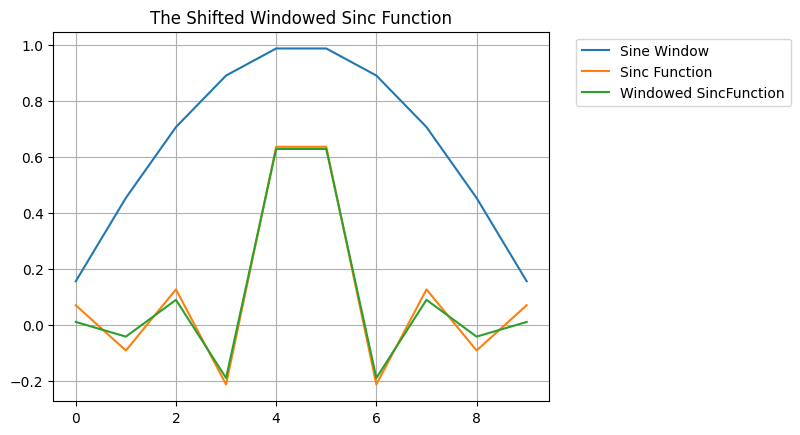

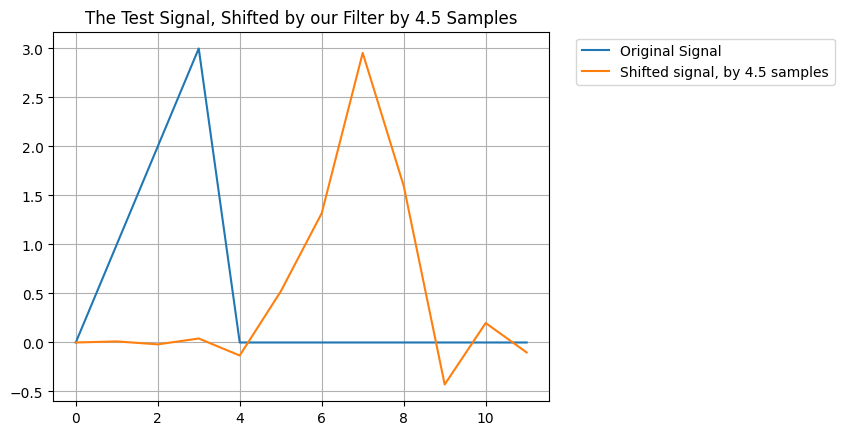

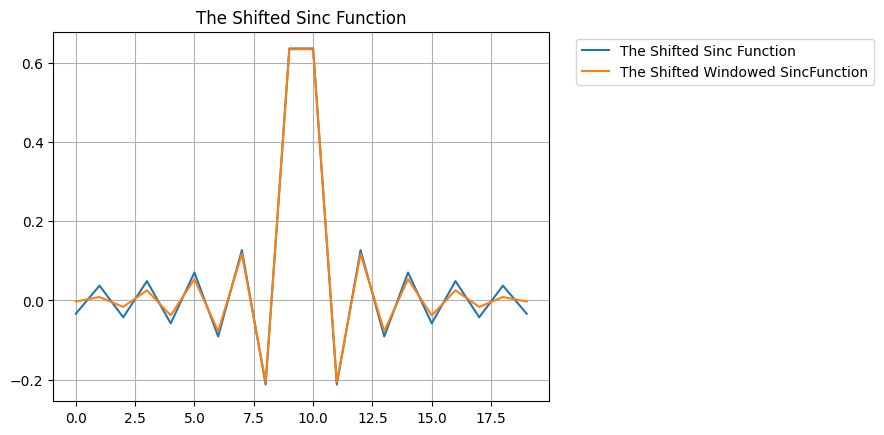

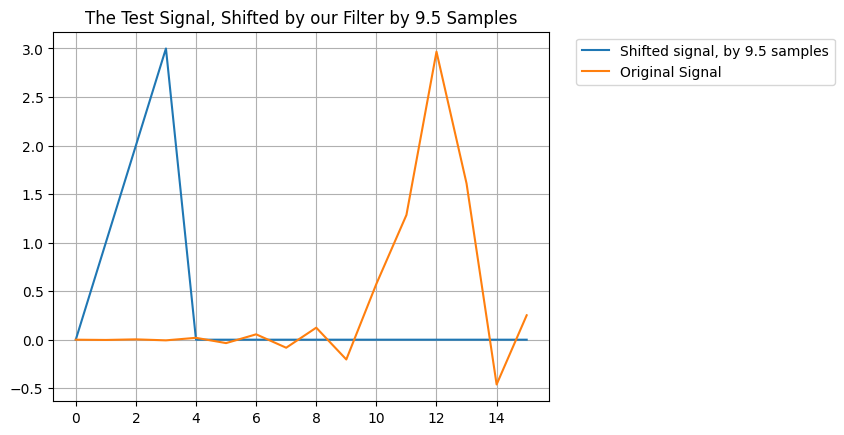

In [25]:
%matplotlib inline
from sympy import init_printing
init_printing()
import numpy as np
import matplotlib.pyplot as plt

#time index range:
L=10
n=np.arange(L)
print('n:',n)

w=np.sin(np.pi/L*(n+0.5))
plt.figure()
plt.plot(w)
plt.plot(np.sinc(-0.5+n-4))


h=w*np.sinc(-0.5+n-4)

plt.plot(h)
plt.legend(('Sine Window', 'Sinc Function', 'Windowed SincFunction'),bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('The Shifted Windowed Sinc Function')
plt.grid()

plt.figure()
x=np.hstack((np.arange(4),np.zeros(8)))
plt.plot(x)

import scipy.signal as sp
y=sp.lfilter(h,1,x)
plt.plot(y)
plt.legend(('Original Signal','Shifted signal, by 4.5 samples'),bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('The Test Signal, Shifted by our Filter by 4.5 Samples')
plt.grid()

#Test with longer filter, to reduce errors:
plt.figure()
L=20
n=np.arange(L)
w=np.sin(np.pi/L*(n+0.5))
plt.plot(np.sinc(-0.5+n-9))
h=w*np.sinc(-0.5+n-9)
plt.plot(h)
plt.legend(('The Shifted Sinc Function','The Shifted Windowed SincFunction'),bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('The Shifted Sinc Function')
plt.grid()

plt.figure()
x=np.hstack((np.arange(4),np.zeros(12)))
y=sp.lfilter(h,1,x)
plt.plot(x)
plt.plot(y)
plt.legend(('Shifted signal, by 9.5 samples', 'Original Signal'),bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('The Test Signal, Shifted by our Filter by 9.5 Samples')
plt.grid()

**Observe:** The longer we make the filter, keeping the main
lobe of the sinc function in the center, the smaller the
resulting error for the shifted signal x becomes, but the
hight of the ripples remains similar.

In [26]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/krAMLN7tF0M" frameborder="0" allow="accelerometer;
encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

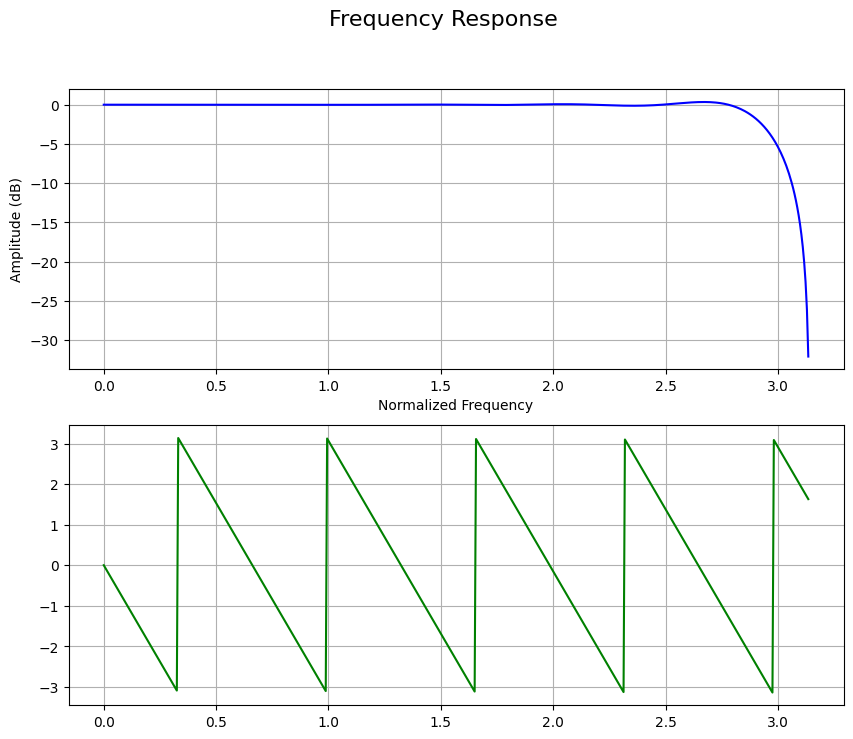

In [27]:
from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(h)

fig=plt.figure(figsize=(10,8))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w, 20 * np.log10(abs(h_response)), 'b')
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
'''ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))'''
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w, angles, 'g')
'''plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))'''
plt.grid()


**Observe** the phase plot at normalized frequency.

Remember: Angle= -d Omega, for a delay d,
hence d= -Angle/Omega, the negative slope.

Also observe that the magnitude deviates from 0 dB at
high frequencies at about above normalized frequency 2.8.

To estimate the obtained delay (for verification), we use
the mouse, got to y=-3.14, which is the first wrap around
point, and read out position x=0.32. From that we obtain
the delay d= -y/x=3.14/0.32=9.8, which is indeed roughly
the desired 9.5 samples delay. Observe that our calculation
from the plot is only a rough estimation.

This gives us a **tool for fractional delays!**
But we have this attenuation at high high frequencies.
IIR filters can improve our filters performance.

In [28]:
# Delay:
peaks, _ = sp.find_peaks(-angles, height=0)
-angles[peaks[0]]/w[peaks[0]]


9.5

## IIR Fractional Delay Filter Design

In “I. Senesnick, “Low-pass filters realizable as allpass
sums: design via a new flat delay filter,” in
IEEE Transactions on Circuits and Systems II:
Analog and Digital Signal Processing, vol. 46,
1999” we found a way to design fractional delay IIR allpass
filters. https://ieeexplore.ieee.org/document/749080

In [29]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/-_-k_o3CLpc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [30]:
%%html
<iframe src='https://ieeexplore.ieee.org/document/749080/references#references', width=800, height=400></iframe>

As a Python function it is,

In [31]:
def allp_delayfilt(tau):

    '''
    produces a Fractional-delay All-pass Filter
    Arguments: tau: fractional delay in samples (float).
    :returns:
    a: Denominator of the transfer function
    b: Numerator of the transfer function
    '''

    L = int(tau)+1
    n = np.arange(0,L)
    a_0 = np.array([1.0])
    a = np.array(np.cumprod( np.divide(np.multiply((L -
    n), (L-n-tau)) , (np.multiply((n+1), (n+1+tau))))))
    a = np.append(a_0, a) # Denominator of the transfer function
    b = np.flipud(a) # Numerator of the transfer function
    return a, b

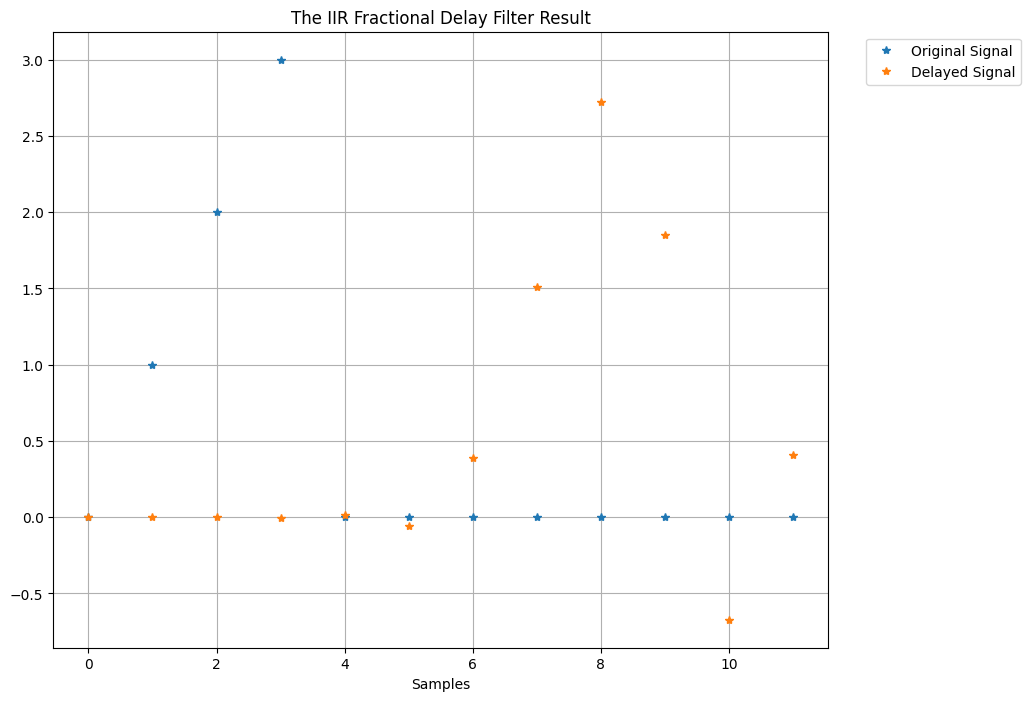

In [32]:
#testing the fractional delay allpass filter
import matplotlib.pyplot as plt
import scipy.signal as sp
#fractional delay of 5.5 samples:
a,b=allp_delayfilt(5.5)
x=np.hstack((np.arange(4),np.zeros(8)))
y=sp.lfilter(b,a,x) #applying the allpass filter

plt.figure(figsize=(10,8))
plt.title('The IIR Fractional Delay Filter Result')
plt.xlabel('Samples')
plt.plot(x, '*', label='Original Signal')
plt.plot(y, '*', label='Delayed Signal')
plt.grid()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");

**Observe** that the extrapolated zero crossing of the orange
delayed signal would indeed be at around 5.5 samples.
Also observe that particularly before our signal we now
have **fewer ripples**.

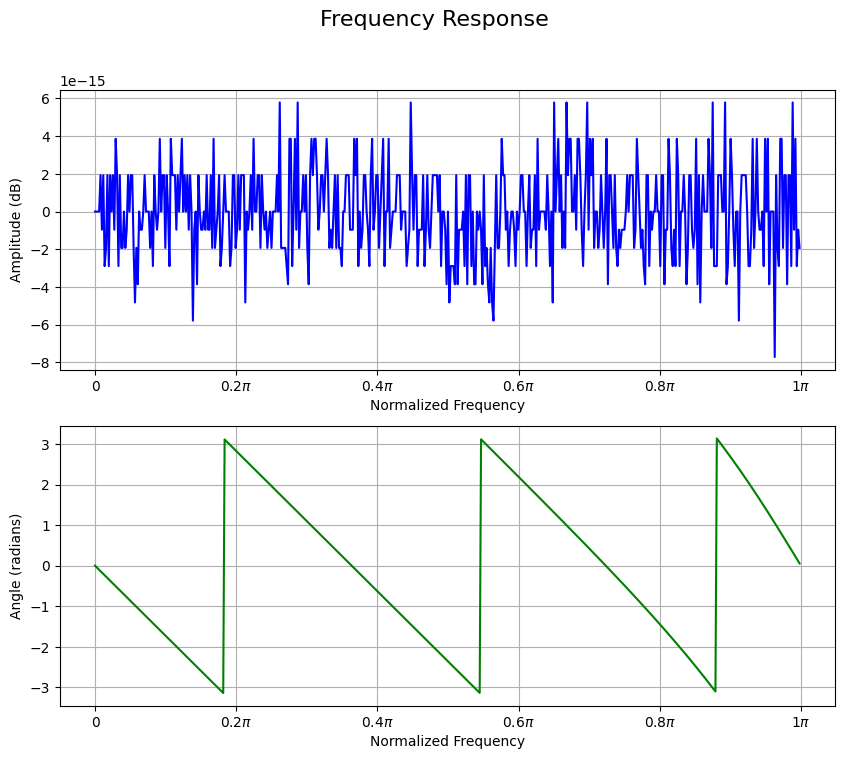

In [33]:
# Frequency Response

from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(b,a)

fig=plt.figure(figsize=(10,8))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response)), 'b')
#plt.ylim((-0.001,0.001))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()


 Now we obtain a nice impulse response or set of coefficients hmin and its frequencies response is:

**Observe** that the magnitude is practically precisely at 0 dB,
except for rounding errors, meaning a gain factor of 1.

**Observe** the phase plot at normalized frequency, put the
mouse over Omega=0.5. The angle is -2.8 radiants.
Remember: Angle= -d Omega, for a delay d,
hence d= -Angle/Omega = 2.8/0.5=5.6.

This fits nicely to our desired delay of 5.5 samples!

delay at first phase peak= 5.500000007209069
a= [ 1.00000000e+00  4.61538462e-01 -7.69230769e-02  1.80995475e-02
 -3.57227911e-03  4.76303882e-04 -3.10632966e-05] b= [-3.10632966e-05  4.76303882e-04 -3.57227911e-03  1.80995475e-02
 -7.69230769e-02  4.61538462e-01  1.00000000e+00]


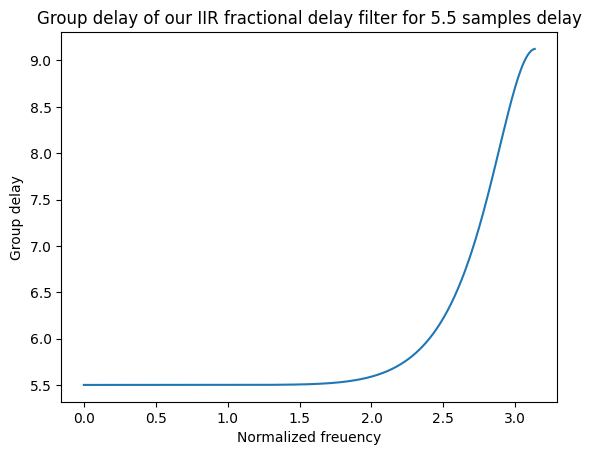

In [36]:
# Delays
peaks, _ = sp.find_peaks(-angles, height=0)
print("delay at first phase peak=",-angles[peaks[0]]/w[peaks[0]])

w,gd=sp.group_delay((b,a))
plt.plot(w,gd)
plt.xlabel('Normalized freuency')
plt.ylabel('Group delay')
plt.title('Group delay of our IIR fractional delay filter for 5.5 samples delay')
print("a=", a, "b=",b)

**Observe**: The desired 5.5 samples delay are only there up to normalized frequency of about 2.0. That is a shortcoming of this filter.

**Application example**: Stereo source separation, with 2
sources and 2 microphones. We want to cancel one of the
2 sources, and for that we need to model the precise delay
from one microphone to the other to be able to remove
the signal by subtraction. See e.g.:

    - Oleg Golokolenko and Gerald Schuller:
    "FAST TIME DOMAIN STEREO AUDIO SOURCE SEPARATION USING FRACTIONAL DELAY FILTERS", 147th AES Convention,
    October, 2019, 16 – 19, New York, NY, USA
    - Oleg Golokolenko, Gerald Schuller: "A FAST STEREO AUDIO SOURCE SEPARATION FOR MOVING SOURCES",
    Asilomar Conference on Signals, Systems, and Computers, Nov 3-6, 2019, Asilomar, CA, USA

## Simple IIR Allpass Filters

The simplest allpass filter has one pole and one zero in the z-domain for the transfer function,

$$\large
H_{ap}(z)=\frac{z^{-1} -\bar{ a} }  {1 -a z^{-1}}=\frac{-\bar{ a} (1- \frac{z^{-1} } {\bar {a}}) }  {1 -a z^{-1}}
$$   

where $a$ is a complex number, and $\bar{a}$ specifies the conjugate complex number.

Observe that here we have a zero at $z=\frac{1}{a}$ and a pole at $z=a$! **The pole and the zero are at conjugate reverse locations!**

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_SzJLFPuBig" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Example:** If a=0.5, we obtain the pole/zero plot with Python,

In [11]:
def zplane(B,A):
    # Plot Poles and Zeros
    from  matplotlib import patches
    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    r = 2.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    #ticks = [-1, 1]; plt.xticks(ticks); plt.yticks(ticks)
    # Unit Circle
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel('Re', horizontalalignment='right', x=1.0)
    plt.ylabel('Im',  y=1.0)
    plt.title('Complex z-Plane', loc='right')
    plt.grid()
    plt.plot(np.real(A),np.imag(A),'rx')
    plt.plot(np.real(B),np.imag(B),'bo')

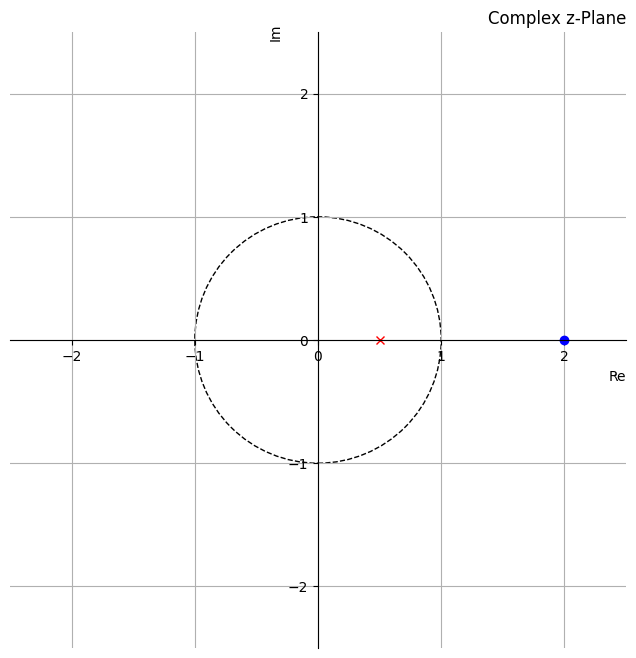

In [12]:
a=0.5; #Pole location
B=[1/a.conjugate()]; #the zero location
A=[a];
zplane(B,A); #plot the pole/zero diagram with axis limits


In this plot, the cross at 0.5 is the pole, and the circle at 2 is the zero.

How can we see that the magnitude of the frequency response $H(e^{j \cdot \Omega})$ is 1? We can re-write it as

$$\large
H_{ap}(e^{j \Omega})=\frac{e^{-j \Omega} -\bar{ a}} {1 -a e^{-j \Omega}}=e^{-j \Omega}\frac{1 -\bar {a} e^{j \Omega}}  {1 -a e^{-j \Omega}}
$$

Here you can see that the expression in the numerator is the **conjugate complex** of the denominator, hence their **magnitude** cancels to **one**. The exponential before the fraction also has magnitude 1, hence the entire expression has magnitude 1,

$$\large
\mid{H_{ap}(e^{j}\Omega)}\mid=1
$$

Here we can see, using just 1 pole and one zero, we can obtain a magnitude of constant 1.

More interesting now is the resulting phase. The phase function can be found in the book Oppenheim/Schafer, “Discrete Time Signal Processing”:

$$\large
\begin{equation}
\phi(\Omega)=- \Omega - 2 arctan \left(\frac{r sin(\Omega-\theta)} {1 - r cos(\Omega-\theta)} \right)
\end{equation}
$$

where r is the magnitude of a and $\theta$ is the phase angle of a (hence $a=r\cdot e^{j \theta}$).

Observe that so far we assumed the phase to be linearly dependent on the frequency ($\phi(\Omega=-\Omega \cdot d)$), and here we see it to be quite non-linear, with the trigonometric functions!


We can now plot the resulting phase over the normalized frequency, and compare it with the phase of a delay of 1 sample (of $z^{-1}$), where we get $\phi(\Omega)=-\Omega$. This can be seen in the following plot, for $a=0.5$ and $a=-0.5$:


In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Mbk8-zRg-9o" frameborder="0" allow="accelerometer;
encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# For Google Colab
import sys
if 'google.colab' in sys.modules:
    !pip install matplotlib==3.1.3

Hap=


   _    -ⅈ⋅\Omega 
 - a + ℯ          
──────────────────
     -ⅈ⋅\Omega    
- a⋅ℯ          + 1

Magnitude=


   ______________________________________                   
  ╱   _      -ⅈ⋅\Omega    ⅈ⋅\Omega _      │       1        │
╲╱  a⋅a - a⋅ℯ          - ℯ        ⋅a + 1 ⋅│────────────────│
                                          │   -ⅈ⋅\Omega    │
                                          │a⋅ℯ          - 1│

For a = 0.5, |Hap| =


1.00000000000000

Phase:


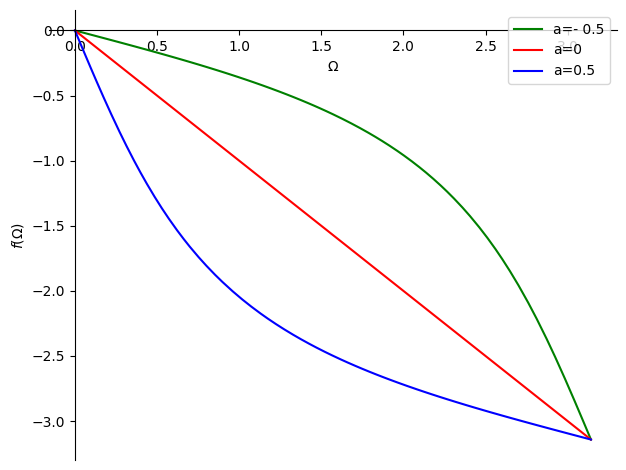

In [13]:
from sympy import symbols, I , E, conjugate, Abs
from sympy.functions import arg
from sympy.plotting import plot



a = symbols('a', complex=True)
omega, r  = symbols('\Omega r', real=True)

Hap=(E**(-I*omega)-conjugate(a))/(1-a*E**(-I*omega))
print('Hap=')
display(Hap)
print('Magnitude=')
display(Abs(Hap))
print('For a = 0.5, |Hap| =')
display(Abs(Hap.subs(a,-0.5)))
print('Phase:')
phase=arg(Hap.subs(a,r*E**(I*omega)))


p = plot(arg(Hap.subs(a,-0.5)),arg(Hap.subs(a,0)),arg(Hap.subs(a,0.5)), (omega,0,np.pi), show = False, legend = True)
p[0].line_color = 'green'
p[0].label = 'a=- 0.5'
p[1].line_color = 'red'
p[1].label = 'a=0'
p[2].line_color = 'blue'
p[2].label = 'a=0.5'
p.show()


Here, the blue line is the allpass phase for a=0.5, the green line for a=-0.5, and the red line is for a=0, the phase of a pure 1 sample delay $z^{-1}$. Here it can be seen that the beginning and end of the curves are identical (at frequencies 0 and pi), and only in between the allpass phase deviates from the 1 sample delay! For a=0 the allpass indeed becomes identical to $z^{-1}$, a delay of 1 sample. So we can see that it behaves very **similar to a delay**.

Such an IIR allpass filter can also be used to implement **fractional delays**. In the above plot, observe the different **slopes** or **derivatives** of the phase function with respect to frequency, which shows different **group delays** for different coefficients a. For instance the green curve for a=-0.5 at frequencies below about half Nyquist frequency has a slope which is about a third of the slope of the red curve for a delay of 1 sample, and hence represents a fractional delay.

This application is described more detailed e.g. in:
T. I. Laakso, V. Välimäki, M. Karjalainen, and U. K. Laine.
Splitting the unit delay. IEEE Signal
Processing Magazine, 13(1):30–60, January 1996.


In [ ]:
%%html
<iframe src='https://ieeexplore.ieee.org/document/482137', width=800, height=400></iframe>

## Frequency Warping

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/EH6UWE7sauI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

For a=0.5 (the blue curve) we observe a **“streching”** of the low frequency range, where a small part of the low frequencies strech over a wider phase range than the other curves.

For the frequency warping we will interpret the negative phase as a normalized frequency.

The plot can also be produced with a simple Python function for the phase function:

In [14]:
def warpingphase(w, a):
    #produces (outputs) phase wy for an allpass filter
    #w: input vector of normlized frequencies (0..pi)
    #a: allpass coefficient
    #phase of allpass zero/pole :
    theta = np.angle(a);
    #magnitude of allpass zero/pole :
    r = np.abs(a);
    wy = -w-2*np.arctan((r*np.sin(w-theta))/(1-r*np.cos(w-theta)));

    return wy

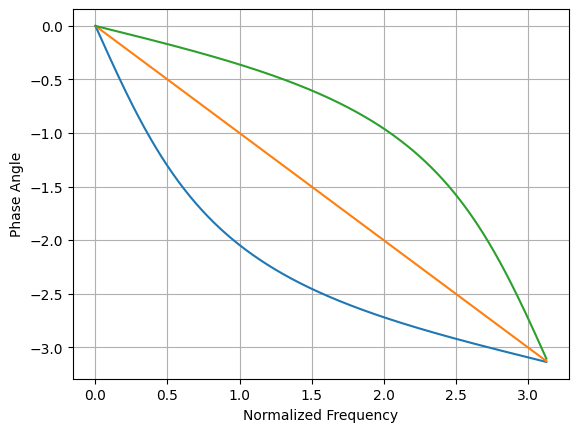

In [15]:
w=np.arange(0,3.14,0.01)
plt.figure()
plt.plot(w,warpingphase(w,0.5))
plt.plot(w,warpingphase(w,0))
plt.plot(w,warpingphase(w,-0.5))
plt.grid()
plt.xlabel('Normalized Frequency')
plt.ylabel('Phase Angle');

The **phase** at the output of our phase function can also be **interpreted as a normalized frequency**. This means its **output** can be the **input** of another warpingphase function.

An interesting observation is, that the warpingphase function with coefficient $-\bar{a}$ is the inverse of the warpingphase function with coefficient $a$!

We can try this in Python:

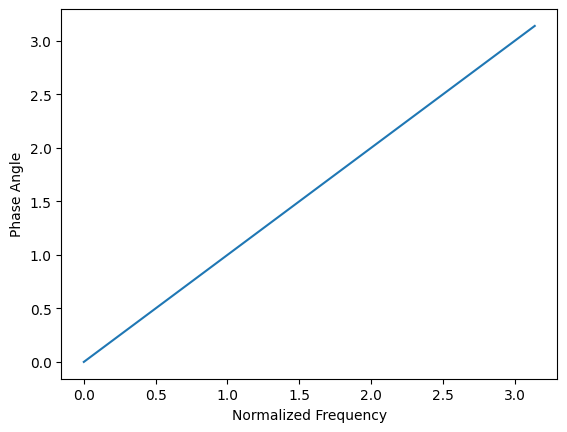

In [16]:
import matplotlib.pyplot as plt
#from warpingphase import *
#frequency range:
w = np.arange(0,np.pi, 0.01)
a = 0.5 * (1+1j)
wyy = (warpingphase(warpingphase(w,a), -a.conjugate()))
plt.figure()
plt.plot(w,wyy)
plt.xlabel('Normalized Frequency')
plt.ylabel('Phase Angle')
plt.show()

Here we see that it is indeed the **identity** function. This shows that interpreting the allpass as a normalized frequency “warper”, the allpass with coefficient $a$ is inverse to the allpass with $-\bar{a}$.

What is the frequency response of an example allpass filter? For $a=0.5$, we can use ```freqz```.

There we expect to see the magnitude to be contant 1, and the phase angle like we saw from our phase formula for Oppenheim, Schafer, (eq. 1). This also allows “cross-checking” the results!

Looking at the z-transform:
    $$\large
    H_{ap}(z)=\frac{z^{-1} -\bar{ a} } {1 -a z^{-1}}
    $$

we get our coefficient vectors to

`a=0.5;
B=[-a.conjugate(), 1];
A=[1, -a];`

(observe that for freqz the higher exponents of $z^{-1}$ appear to the right)

Now we plot the frequency response and impulse response:

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/fDjerT8uCvU" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

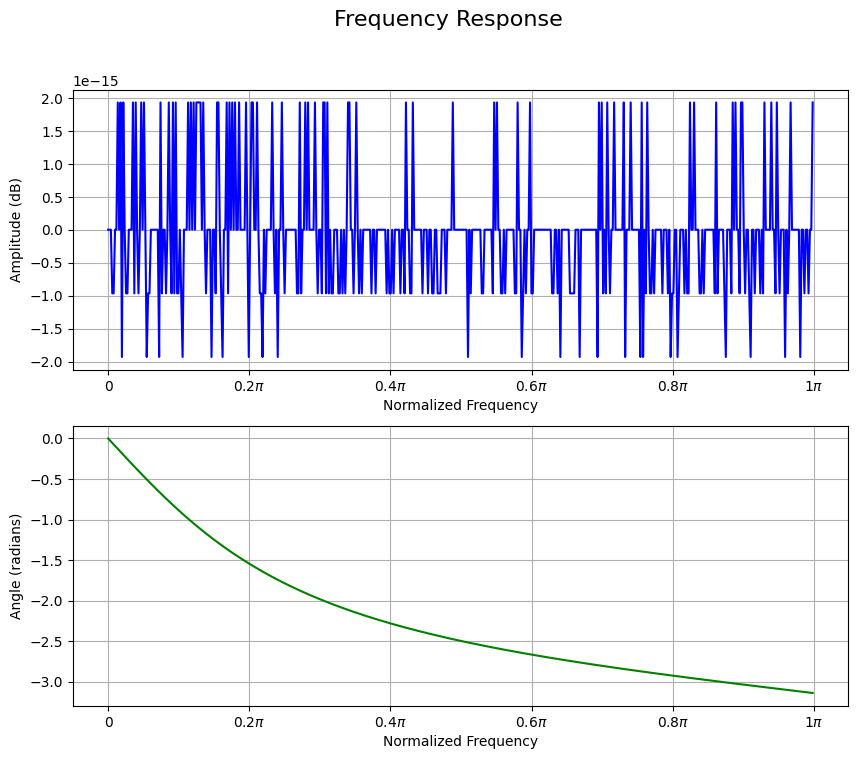

In [17]:
a=0.5;
B=[-a.conjugate(), 1];
A=[1, -a];

# Frequency Response

from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(B,A)

fig=plt.figure(figsize=(10,8))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response)), 'b')
#plt.ylim((-0.001,0.001))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()


 Here we can see in the above plot of the magnitude, that we indeed obtain a constant 1 (which is 0 dB, 2e-15 comes from the finite accuracy and rounding errors), and that we have the **non-linear** phase in the lower plot, as in the phase plots before.

To obtain the impulse response, we can use the function “lfilter”, and input a unit impulse into it.

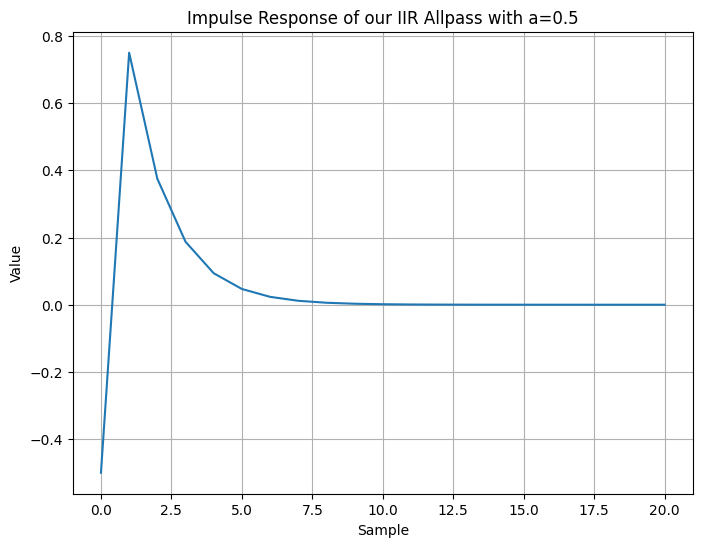

In [18]:
from scipy import signal as sp
Imp = np.zeros(21)
Imp[0] = 1
h = sp.lfilter(B, A, Imp)
plt.figure(figsize=(8,6))
plt.plot(h)
plt.title('Impulse Response of our IIR Allpass with a=0.5')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()

Here we can see that we have the first, non-delayed, sample not at zero, but at -0.5. This can also be seen by plotting the first 4 elements of our impulse response:

`
print h[0:4]
ans =
[-0.5     0.75    0.375   0.1875]`

The second element corresponds to the delay of 1 sample, our $z^{-1}$, with a factor of 0.75. But then there are more samples, going back into the past, exponentially decaying.

This means, not only the past samples goes into our filtering calculation, but also more past samples, and even the **non-delayed** sample, with a factor of -0.5. This is actually a problem for the so-called frequency warping (next section), if we want to use frequency warping in IIR filters, because here we would get delay-less loops, which are difficult to implement! (With **FIR filters** this is **no problem** though)

# Frequency Warping

These properties of the allpass can now be used to “warp” the frequency scale of a filter (by effectively replacing $e^{j\Omega} \leftarrow e^{j\phi (\Omega)}$ in our frequency response), for instance to map it according to the so-called **Bark scale**, used in psycho-acoustics.

A common approximation of the Bark scale is

$$\large
Bark=13 \cdot arctan(0.0076 \cdot f) + 3.5 \cdot arctan\left(\left(\dfrac{f}{7500}\right)^2\right)
$$

(From Wikipedia, Bark scale, the approximation goes back to Zwicker and Terhard), where f is the frequency in Hz. The Bark scale can be seen as an approximation of the changing frequency resolution over frequency of the inner ear filters of the human ears cochlea.

Because of the structure of our chochlea, the ear has different sensitivites for different frequencies and different signals. The signal dependent threshold of audibility of the ear is called the **Masking Threshold**. It has more spectral detail at lower than at higher frequencies, according to the Bark scale.

We can plot the Bark formula using the python:

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/-toXcoqWHRE" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

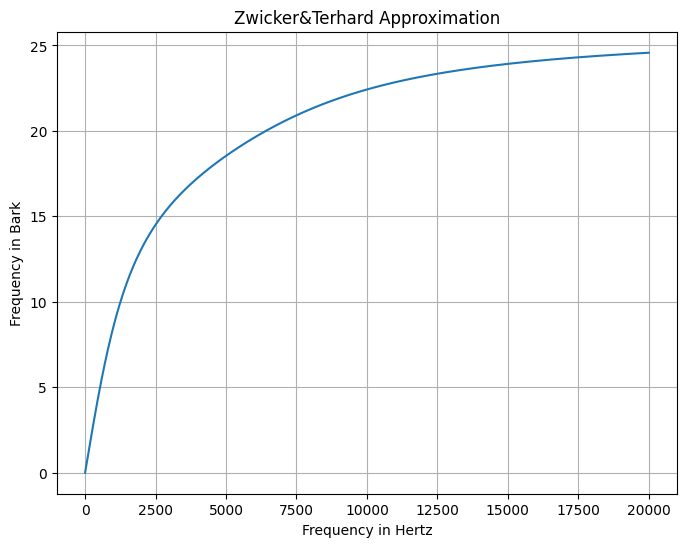

In [19]:
#Frequency array between 0 and 20000 Hz in 1000 steps:
f=np.linspace(0,20000,1000)
#Computation of Zwickers Bark approximation formula:
z=13*np.arctan(0.00076*f)+3.5*np.arctan((f/7500.0)**2)
#plot Bark over Hertz:
plt.figure(figsize=(8,6))
plt.plot(f,z)
plt.xlabel('Frequency in Hertz')
plt.ylabel('Frequency in Bark')
plt.title('Zwicker&Terhard Approximation')
plt.grid()

Here we can see, that 1 bark at lower frequency has a much lower bandwidth than at higher frequencies. This means the ear can be seen as having a higher frequency resolution at lower frequencies than at higher frequencies. Imagine, we want to **design a filter** or system for **hearing purposes**, for instance, we would like to model the masking threshold of the ear for any given signal by some linear filter (FIR or IIR).

Then it would be useful, to give this filter a **higher frequency resolution at lower frequencies**, such that it matches the smaller details of the **masking threshold** at lower frequencies.  But if we look at the **usual design methods**, they distribute the filter **details independent of the frequency range** (for instance what we saw with the remez method, where we have equally distributed ripples).

Here we can now use frequency warping, such that we **enlarge the low frequency range** and shrink the high frequency range accordingly, such that our filter now works on the **warped frequency**, and **“sees”** the **lower frequencies in more detail**, the lower frequencies are more spread out in comparison to the higher frequencies.

**How do we do this?** For some frequency response $H(e^{j\Omega})$ we would like to warp the frequency $\Omega$ with some function $\phi(\Omega)$ according to our desired frequency scale, such that we get

$$\large
H(e^{j\cdot \phi (\Omega)})
$$

But this is exactly the principle of an **allpass filter**, which has the frequency response

$$\large
H_{ap}(e^{j \Omega})=e^{j \cdot \phi_{ap}(\Omega)}
$$
    
Usually we would like to map positive frequencies to again positive frequencies, and we saw that $\phi_{ap}(\Omega)$ becomes negative, hence we take the approach to **replace z** in the argument of our transfer function with the reverse of our **allpass** transfer function:


$$\large
z^{-1}\leftarrow H_{ap}(a,z)$$

This is replacing all delays of our filter to be warped by our allpass filter.

In this way we replace our linear function on the unit circle in z with the non-linear, warped function on the unit circle $H_{ap}$.

Hence we get the warped transfer function as:

$$\large
H_{warped}(z)=H(H_{ap}( a,z)^{-1})$$

and the resulting frequency response becomes:

$$\large
H_{warped}(e^{j \Omega})=H(e^{-j \cdot \phi_{ap}(\Omega)})
$$

Here we can now see that we obtained the **desired frequency warping.**

What does this mean for the filter implementation? We know that our FIR  filters always consist of many delay elements $z^{-1}$.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/2arqHPweD5I" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Example:** Take an FIR filter,

$$\large
H(z)= {\sum _{m=0} ^ L b(m)  \cdot z^{-m}} $$

its warped version is:

$$\large
H(H_{ap}(a,z)^{-1})= {\sum_ {m=0} ^ L b(m)  \cdot H^{m}_{ap}(a,z)} $$


To obtain a desired filter, we now first have to **warp our desired filter**, and then **design** our filter in the **warped domain**.

Observe that the warping turns an **FIR filter into an IIR filter**, because the allpass has poles outside of zero.

An example of this kind of design can be seen in the following picture.

(From [1])

Here we can see that the 12th order filter successfully approximated the more detailed curve at low frequencies, using the warping approach.

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture9-2.PNG?raw=1' width="600">
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture9-3.PNG?raw=1' width="600">
</center>


    - [1] Julius O. Smith and Jonathan S. Abel, “Bark and ERB Bilinear Transforms,”
    IEEE Transactions on Speech and Audio Processing, vol. 7,
    no. 6, pp. 697 – 708, November 1999.
    - [2] S. Wabnik, G. Schuller, U. Kraemer, J. Hirschfeld:
    "Frequency Warping in Low Delay Audio Coding",
    IEEE International Conference on Acoustics, Speech, and Signal Processing,
    Philadelphia, PA, March 18–23, 2005